Project Description

The Nobel Prize is awarded yearly to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace, with the first prize awarded in 1901. Are there any biases in the way the honors are awarded? Use your data manipulation and visualization skills to explore the history of this coveted prize.

#### The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.
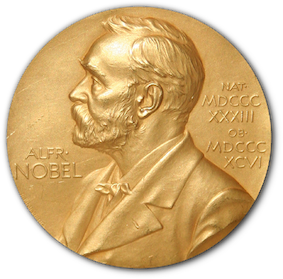
#### The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv file in the data folder.                                In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Import liberaries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import DataFrame
nobel = pd.read_csv(r"C:\Users\NEW USER\Downloads\Visualizing the History of Nobel Prize Winners\nobel.csv")
print(nobel.head())

# Getting to know my data
print(nobel.info())

# Gaining a quick understanding of data included in numerical columns 
print(nobel.describe())

# validating numerical columns
print(nobel.select_dtypes("number").head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...       1-Jan          160   
1  "in special recognition of his poetic composit...       1-Jan          569   
2  "for his work on serum therapy, especially its...       1-Jan          293   
3                                                NaN       2-Jan          462   
4                                                NaN       2-Jan          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

In [3]:
# Converting birth_date and death_date to datetime format using mixed format
nobel["birth_date"] = pd.to_datetime(nobel["birth_date"], format='mixed', errors='coerce')
nobel["death_date"] = pd.to_datetime(nobel["death_date"], format='mixed', errors='coerce')
print(nobel.dtypes)

year                             int64
category                        object
prize                           object
motivation                      object
prize_share                     object
laureate_id                      int64
laureate_type                   object
full_name                       object
birth_date              datetime64[ns]
birth_city                      object
birth_country                   object
sex                             object
organization_name               object
organization_city               object
organization_country            object
death_date              datetime64[ns]
death_city                      object
death_country                   object
dtype: object


In [4]:
# Checking for missing values
print(nobel.isna().sum())
Threshold = len(nobel) * 0.05
print(Threshold)

# Filtering for columns with remaining missing values
remaining_cols_with_missing_values = nobel.columns[nobel.isna().sum() > 0]
print(remaining_cols_with_missing_values)

# Fill missing values in each column with its mode
for col in remaining_cols_with_missing_values:
    mode_value = nobel[col].mode()[0]   # Most frequent value
    nobel[col] = nobel[col].fillna(mode_value)   # assign back safely


# Verify missing values are filled
print(nobel.isna().sum())


year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               44
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64
50.0
Index(['motivation', 'birth_date', 'birth_city', 'birth_country', 'sex',
       'organization_name', 'organization_city', 'organization_country',
       'death_date', 'death_city', 'death_country'],
      dtype='object')
year                    0
category                0
prize                   0
motivation              0
prize_share             0
laureate_id             0
laureate_type           0
full_name               0
birth_date              0
birth_city             

#### What is the most commonly awarded gender and birth country? Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Most common gender: Male
Most common birth country: United States of America


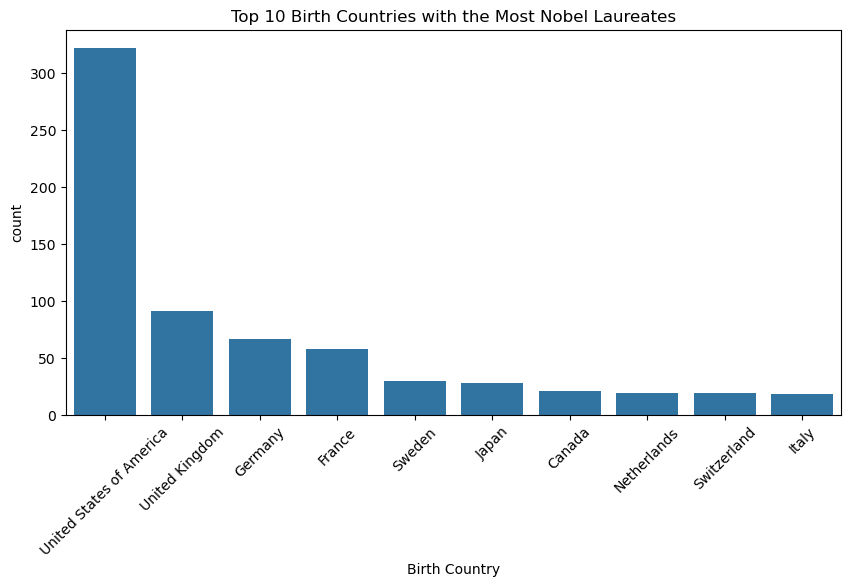

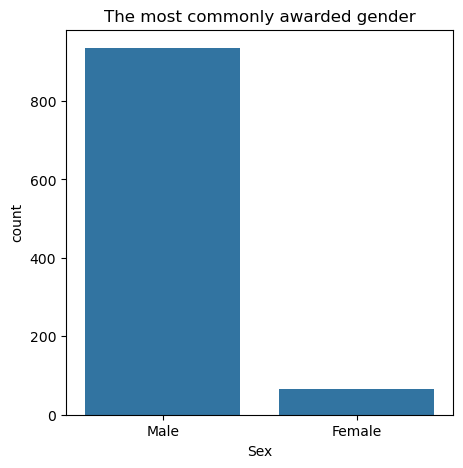

0    1900
1    1900
2    1900
3    1900
4    1900
Name: decade, dtype: int64
    decade  usa_born_winner
10    2000         0.455285
12    2020         0.440000
9     1990         0.432692
4     1940         0.372093
8     1980         0.350515
11    2010         0.347107
7     1970         0.326923
6     1960         0.316456
5     1950         0.305556
3     1930         0.267857
1     1910         0.125000
2     1920         0.074074
0     1900         0.035088
Decade with highest ratio of US-born Nobel winners: 2000


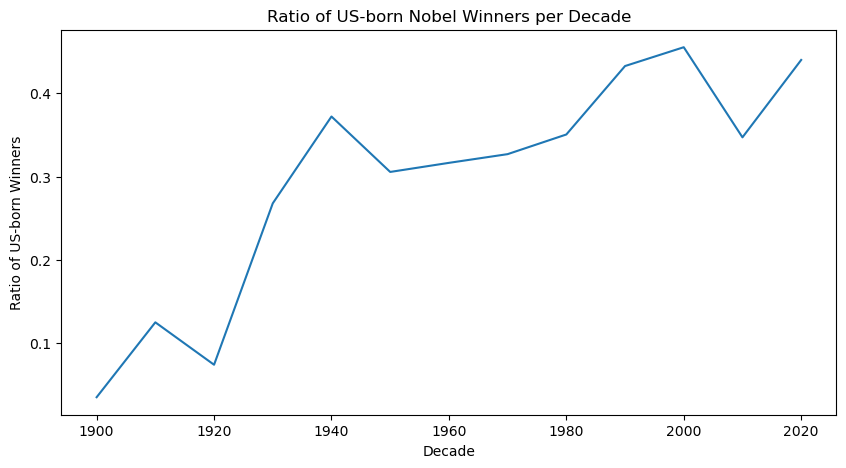

In [12]:
# The most commonly awarded gender and birth country
top_gender = nobel["sex"].mode()[0]
print("Most common gender:", top_gender)
top_country = nobel["birth_country"].mode()[0]
print("Most common birth country:", top_country)

# Visualization of the Top 10 Birth Countries with the Most Nobel Laureates
plt.figure(figsize=(10,5))
sns.countplot(data=nobel, x="birth_country", order=nobel["birth_country"].value_counts().index[:10])
plt.title("Top 10 Birth Countries with the Most Nobel Laureates")
plt.xlabel("Birth Country")
plt.xticks(rotation=45)
plt.show()

# Visual of the most commonly awarded gender
plt.figure(figsize=(5,5))
sns.countplot(data=nobel, x="sex")
plt.title("The most commonly awarded gender")
plt.xlabel("Sex")
plt.show()

# Decade Column of all categories
nobel["decade"] = (nobel["year"]//10)*10
print(nobel["decade"].head())

# Create a column for US-born
nobel["usa_born_winner"] = nobel["birth_country"] == "United States of America"

# Compute ratio per decade
decade_ratio = nobel.groupby("decade")["usa_born_winner"].mean().reset_index()
print(decade_ratio.sort_values(by="usa_born_winner", ascending=False))

# Get the decade with max ratio
max_decade_usa = decade_ratio.loc[decade_ratio["usa_born_winner"].idxmax(), "decade"]
print("Decade with highest ratio of US-born Nobel winners:", max_decade_usa)

# Visual of the ratio of US-born Nobel winners per decade
plt.figure(figsize=(10,5))
sns.lineplot(data=decade_ratio, x="decade", y="usa_born_winner")
plt.title("Ratio of US-born Nobel Winners per Decade")
plt.xlabel("Decade")
plt.ylabel("Ratio of US-born Winners")
plt.show()

#### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

{2020: 'Literature'}


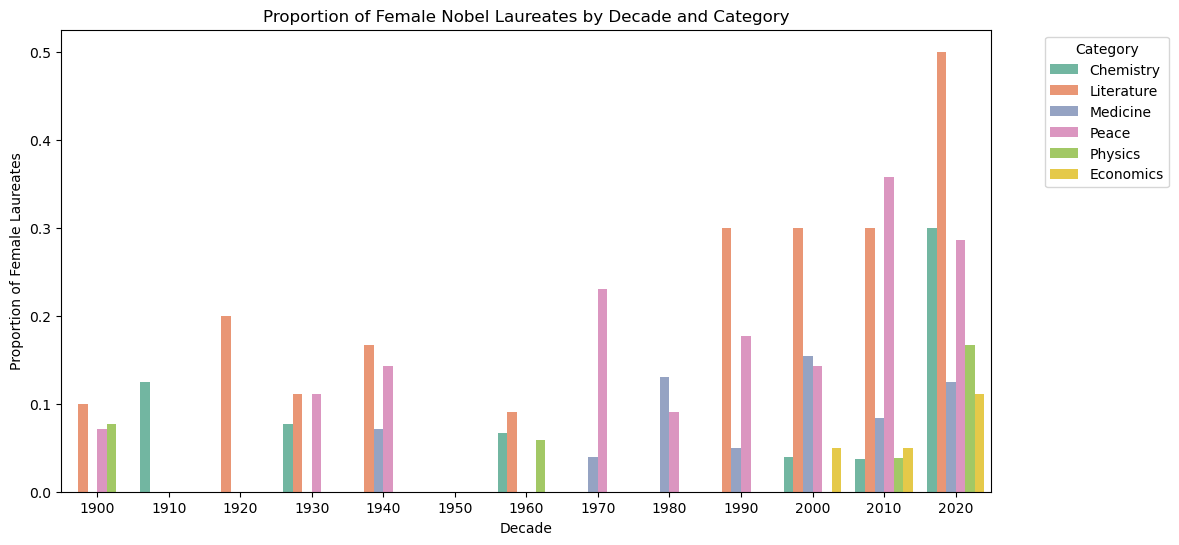

In [7]:
# Create a flag for female winners
nobel["female_winner"] = nobel["sex"] == "Female"

# Group by decade and category, and calculate proportion of female winners
female_proportions = (
    nobel.groupby(["decade", "category"])["female_winner"]
    .mean()
    .reset_index()
)

# Find the row with the maximum proportion
max_row = female_proportions.loc[female_proportions["female_winner"].idxmax()]

# Store as dictionary
max_female_dict = {int(max_row["decade"]): max_row["category"]}

print(max_female_dict)

# Visual of the proportion 
plt.figure(figsize=(12, 6))
sns.barplot(data=female_proportions, x="decade", y="female_winner", hue="category", palette="Set2")
plt.title("Proportion of Female Nobel Laureates by Decade and Category")
plt.xlabel("Decade")
plt.ylabel("Proportion of Female Laureates")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


#### Who was the first woman to receive a Nobel Prize, and in what category?

In [8]:
# Select relevant columns and filter for Female winners, then sort by year 
first_woman_name = nobel[["full_name", "year", "category"]][nobel["sex"]=="Female"].sort_values(by="year", ascending=True)
print(first_woman_name)

# Extract the data from the first row 
first_woman_category = (first_woman_name.iloc[0])
print(first_woman_category)

                                             full_name  year    category
19                         Marie Curie, née Sklodowska  1903     Physics
29   Baroness Bertha Sophie Felicita von Suttner, n...  1905       Peace
51                       Selma Ottilia Lovisa Lagerlöf  1909  Literature
62                         Marie Curie, née Sklodowska  1911   Chemistry
128                                     Grazia Deledda  1926  Literature
..                                                 ...   ...         ...
982                                       Annie Ernaux  2022  Literature
993                                    Anne L’Huillier  2023     Physics
998                                   Narges Mohammadi  2023       Peace
989                                     Katalin Karikó  2023    Medicine
999                                     Claudia Goldin  2023   Economics

[65 rows x 3 columns]
full_name    Marie Curie, née Sklodowska
year                                1903
category           

#### Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [9]:
# Count how many times each full_name appears and filter for names that appear at least 2 times
repeat_list = nobel["full_name"].value_counts()[nobel["full_name"].value_counts() >= 2]
print(repeat_list)

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: count, dtype: int64


In [10]:
# Count how many times each full_name appears
name_counts = nobel['full_name'].value_counts()

# Filter for names that appear at least 2 times
repeat_names = name_counts[name_counts >= 2].index
print(repeat_names)
# Convert to a list
repeat_list = repeat_names.tolist()

# Print the list
print(repeat_list)

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object', name='full_name')
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
